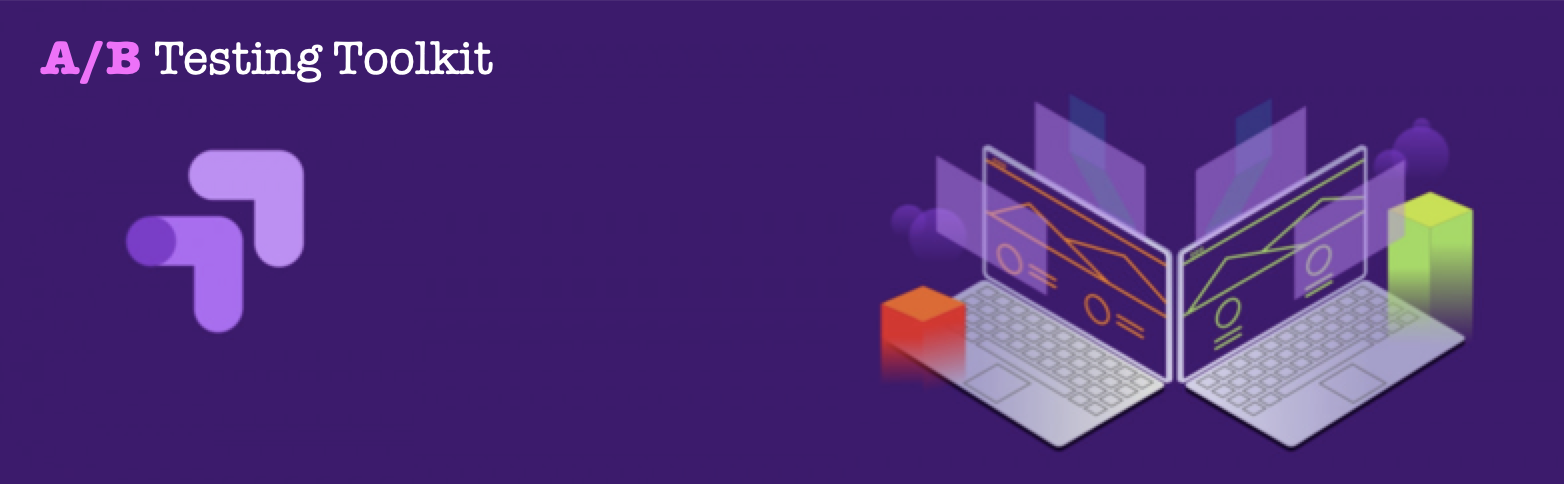

# Parametric Significance Testing (CUPED-Analysis)

In [1]:
## Import packages

import pandas as pd
import seaborn as sb
import matplotlib as plt
import numpy as np
import statistics
from scipy import stats
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import warnings
import statistics
import scipy

In [2]:
## Turn off warnings

warnings.filterwarnings("ignore")

In [24]:
## Load in data

local = 'tribalism_data.csv'
df = pd.read_csv(local, encoding= 'unicode_escape')
df.head(100)

,date,user_experience,session,pre_exp_metric,exp_metric,whatshot_clicks,mostread_clicks,isMobile,browser,operatingSystem,pagePathLevel1,pagePathLevel2,cityId
0,28/02/20,0,2,3,1.500000,0,1,True,Chrome,Android,/sport/,/football/,1013376
1,28/02/20,0,28,37,1.321429,0,0,True,Safari,iOS,/sport/,/football/,1006668
2,28/02/20,0,1,2,2.000000,0,0,True,Safari,iOS,/whats-on/,/food-drink-news/,1006864
3,28/02/20,2,5,6,1.200000,0,0,False,Edge,Windows,/sport/,/football/,1006952
4,28/02/20,1,4,11,2.750000,0,0,True,Chrome,iOS,/sport/,/football/,1006959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,28/02/20,0,6,8,1.333333,0,0,False,Chrome,Windows,/all-about/,/liverpool-fc,1009252
96,28/02/20,2,2,4,2.000000,0,0,False,Safari,Macintosh,/sport/,/football/,1006947
97,28/02/20,0,4,4,1.000000,0,0,False,Chrome,Windows,/all-about/,/liverpool-fc,1029537
98,28/02/20,1,2,2,1.000000,0,0,True,Chrome,Android,/news/,/liverpool-news/,1007060


In [1]:
## Rename user_experience labels from numeric to strings

df.loc[(df.user_experience == 0),'user_experience']= 'No filter is applied'
df.loc[(df.user_experience == 1),'user_experience']= 'Filter Applied'
df.loc[(df.user_experience == 2),'user_experience']= 'Whatshot Widget Removed'

NameError: name 'df' is not defined

In [26]:
## Groupby user_experience

df_grouped = df.groupby(['user_experience']).mean()

# Cleaning data - outliers

In [27]:
## Print standard deviation of overall plays per browser

std = statistics.stdev(df.exp_metric)
print ("Standard deviation of experiment metric is % s"
    % round(std,4))

Standard deviation of experiment metric is 1.0164


In [28]:
## Print the threshold/cut-off for data that needs to be removed from the overall data-frame

outliers = 3 * std

print("Remove data from data-frame that is % s above the mean of the data"
     % round(outliers,4))

Remove data from data-frame that is 3.0493 above the mean of the data


In [29]:
## Create new data-frame with data below the standard deviation (+ 3 SD) values

df_filtered = df[(df['exp_metric'] <  outliers)]
df_filtered.groupby(['user_experience']).mean()

,session,pre_exp_metric,exp_metric,whatshot_clicks,mostread_clicks,isMobile
user_experience,,,,,,
Filter Applied,7.391556,11.232842,1.315415,0.147185,0.020551,0.640506
No filter is applied,7.446338,11.352069,1.316666,0.150765,0.020502,0.643489
Whatshot Widget Removed,7.468656,11.284208,1.313378,0.037449,0.021818,0.643105


# Significance testing (pre CUPED-Analysis)

In [30]:
mc = MultiComparison(df_filtered['exp_metric'], df_filtered['user_experience'])
mc_results = mc.tukeyhsd()
print(mc_results)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1                 group2         meandiff p-adj   lower  upper  reject
----------------------------------------------------------------------------------
      Filter Applied    No filter is applied   0.0013 0.6786 -0.0024 0.0049  False
      Filter Applied Whatshot Widget Removed   -0.002 0.3833 -0.0056 0.0016  False
No filter is applied Whatshot Widget Removed  -0.0033 0.0827 -0.0069 0.0003  False
----------------------------------------------------------------------------------


# Visualisations (pre-CUPED)

In [31]:
# Take random samples from each experimental condition in order to transform to normal distribution to plot distributions

results = [] # create an empty list into which I insert the sampled means
random_state = np.arange(0,1500) # random seeds for reproducibility


# sample with replacement using 50% of the data; do this 1000 times
# and append the mean seeling time to the list ‘results’



for i in range(1500):
 sample = df_filtered.sample(frac=0.5, replace=True, random_state=random_state[i]).groupby(by='user_experience')['exp_metric'].mean()
 results.append(sample)
dist_samples_pre_CUPED = pd.DataFrame(results)
dist_samples_pre_CUPED.head(100)

user_experience,Filter Applied,No filter is applied,Whatshot Widget Removed
exp_metric,1.318144,1.316984,1.312466
exp_metric,1.313692,1.317044,1.314855
exp_metric,1.314133,1.315684,1.314010
exp_metric,1.314367,1.315872,1.316005
exp_metric,1.316164,1.315495,1.310479
...,...,...,...
exp_metric,1.314772,1.317658,1.309257
exp_metric,1.315578,1.316639,1.312173
exp_metric,1.314066,1.313673,1.312591
exp_metric,1.315559,1.316470,1.313174


user_experience
Filter Applied             1.315415
No filter is applied       1.316666
Whatshot Widget Removed    1.313378
Name: exp_metric, dtype: float64


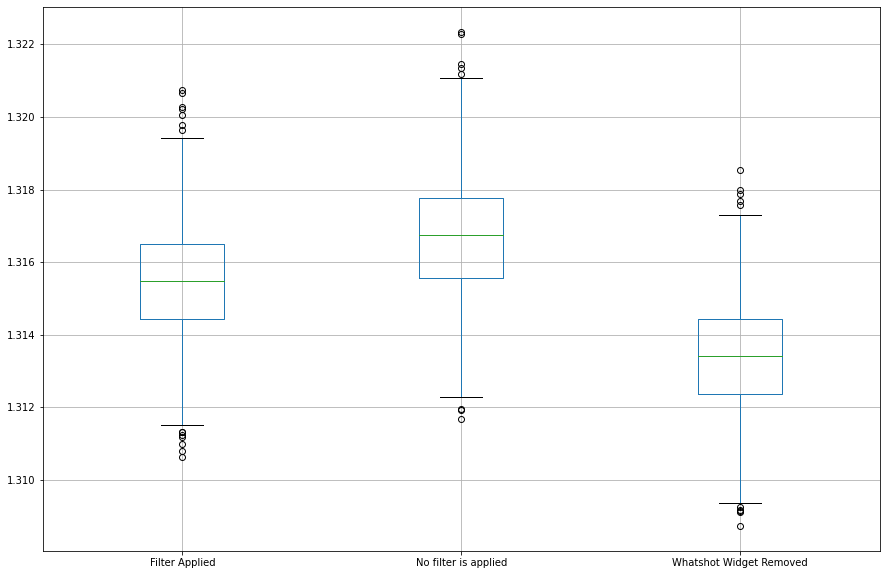

In [32]:
## Plot sampled means in boxplot for experimentation metric

plt.figure(figsize=(15,10))
dist_samples_pre_CUPED.boxplot(column=['Filter Applied', 
                                       'No filter is applied',
                                       'Whatshot Widget Removed'])

pre_cuped_filtered = df_filtered.groupby(['user_experience']).mean()
pre_cuped_results = pre_cuped_filtered['exp_metric']
print(pre_cuped_results)

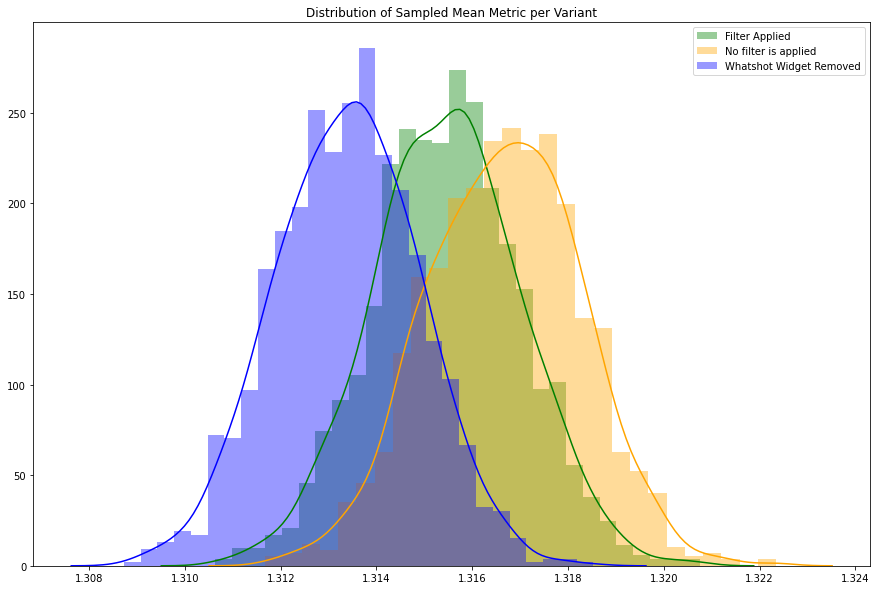

In [33]:
## Plot sampled means for metric in distribution plot

plt.figure(figsize=(15,10))
sb.distplot(dist_samples_pre_CUPED[['Filter Applied']], hist=True, color='green')
sb.distplot(dist_samples_pre_CUPED[['No filter is applied']], hist=True, color='orange')
sb.distplot(dist_samples_pre_CUPED[['Whatshot Widget Removed']], hist=True, color='blue')
plt.legend(labels=['Filter Applied','No filter is applied','Whatshot Widget Removed'])
plt.title("Distribution of Sampled Mean Metric per Variant")
plt.show()

# CUPED-Analysis

In [34]:
## Calculate covariance between pre-experiment and experimental metric

covariance = np.cov(df_filtered.exp_metric, df_filtered.pre_exp_metric)
variance = np.cov(df_filtered.pre_exp_metric)

In [35]:
## Calculate the constant that will be applied to each cookie_id unit

theta_calc = covariance / variance
theta_calc_reshape = theta_calc.reshape(4,1)
theta = theta_calc_reshape[2]
print(theta)

[0.00029604]


In [36]:
## Apply the constant to each cookie_id unit

df_filtered['CUPED-adjusted_metric'] = df_filtered.exp_metric - (df_filtered.pre_exp_metric - statistics.mean(df_filtered.pre_exp_metric)) * theta

In [37]:
## Remove zeros from new data-frame

df_filtered = df_filtered[~(df_filtered['CUPED-adjusted_metric'] <= 0)] 
df_filtered.groupby(['user_experience']).mean()

,session,pre_exp_metric,exp_metric,whatshot_clicks,mostread_clicks,isMobile,CUPED-adjusted_metric
user_experience,,,,,,,
Filter Applied,7.200639,10.933673,1.315403,0.141512,0.019348,0.640489,1.315509
No filter is applied,7.241394,11.032065,1.316653,0.144048,0.019574,0.643470,1.316729
Whatshot Widget Removed,7.249181,10.921243,1.313358,0.036960,0.020847,0.643085,1.313467


In [38]:
## Print standard deviation of overall plays per browser and for the computed CUPED-adjusted_metric

std_plays = statistics.stdev(df_filtered.exp_metric)
std_CUPED = statistics.stdev(df_filtered['CUPED-adjusted_metric'])
mean_plays = statistics.mean(df_filtered.exp_metric)
mean_CUPED = statistics.mean(df_filtered['CUPED-adjusted_metric'])


print("The mean of the plays per browser metric is %s."
% round(mean_plays,4),
"The mean of the CUPED-adjusted metric is % s."
% round(mean_CUPED,4))


print ("The standard deviation of plays per browser is % s."
    % round(std_plays,4),
      "The standard deviation of the CUPED-adjusted metric is % s."
       % round(std_CUPED,4))

The mean of the plays per browser metric is 1.3151. The mean of the CUPED-adjusted metric is 1.3152.
The standard deviation of plays per browser is 0.5688. The standard deviation of the CUPED-adjusted metric is 0.5677.


In [39]:
## Calculate correlation between pre-experiment and experimental metric

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

<Figure size 1440x1440 with 0 Axes>

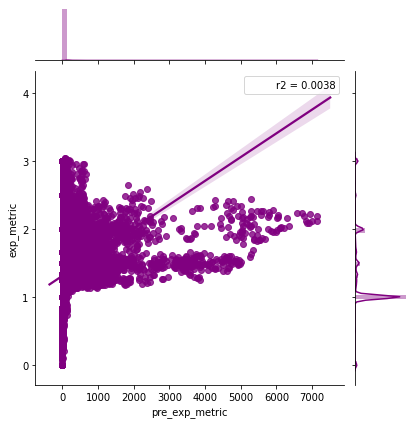

In [41]:
## Plot the correlation

plt.figure(figsize=(20,20))
sb.jointplot(df_filtered.pre_exp_metric, df_filtered.exp_metric, kind="reg", stat_func=r2, data = df_filtered, color = 'Purple')

# Significance testing (post CUPED-Analysis)

In [321]:
## Calculate statistical significance

mc = MultiComparison(df_filtered['CUPED-adjusted_metric'], df_filtered['user_experience'])
mc_results = mc.tukeyhsd()
print(mc_results)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1                 group2         meandiff p-adj   lower  upper  reject
----------------------------------------------------------------------------------
      Filter Applied    No filter is applied   0.0012 0.6888 -0.0024 0.0048  False
      Filter Applied Whatshot Widget Removed   -0.002 0.3805 -0.0056 0.0016  False
No filter is applied Whatshot Widget Removed  -0.0033 0.0852 -0.0069 0.0003  False
----------------------------------------------------------------------------------


# Visualisations (post-CUPED)

In [322]:
# Take random samples from each experimental condition in order to transform to normal distribution to plot distributions

results = [] # create an empty list into which I insert the sampled means
random_state = np.arange(0,1500) # random seeds for reproducibility


# sample with replacement using 50% of the data; do this 1000 times
# and append the mean seeling time to the list ‘results’



for i in range(1500):
 sample = df_filtered.sample(frac=0.5, replace=True, random_state=random_state[i]).groupby(by='user_experience')['CUPED-adjusted_metric'].mean()
 results.append(sample)
dist_samples = pd.DataFrame(results)
dist_samples.head(100)

user_experience,Filter Applied,No filter is applied,Whatshot Widget Removed
CUPED-adjusted_metric,1.318170,1.316553,1.315903
CUPED-adjusted_metric,1.313363,1.316320,1.313124
CUPED-adjusted_metric,1.313577,1.316637,1.314272
CUPED-adjusted_metric,1.319017,1.315973,1.313710
CUPED-adjusted_metric,1.314818,1.317533,1.310362
...,...,...,...
CUPED-adjusted_metric,1.313278,1.313792,1.314846
CUPED-adjusted_metric,1.315397,1.317277,1.312182
CUPED-adjusted_metric,1.315802,1.316013,1.313877
CUPED-adjusted_metric,1.319420,1.315139,1.314640


user_experience
Filter Applied             1.315509
No filter is applied       1.316729
Whatshot Widget Removed    1.313467
Name: CUPED-adjusted_metric, dtype: float64


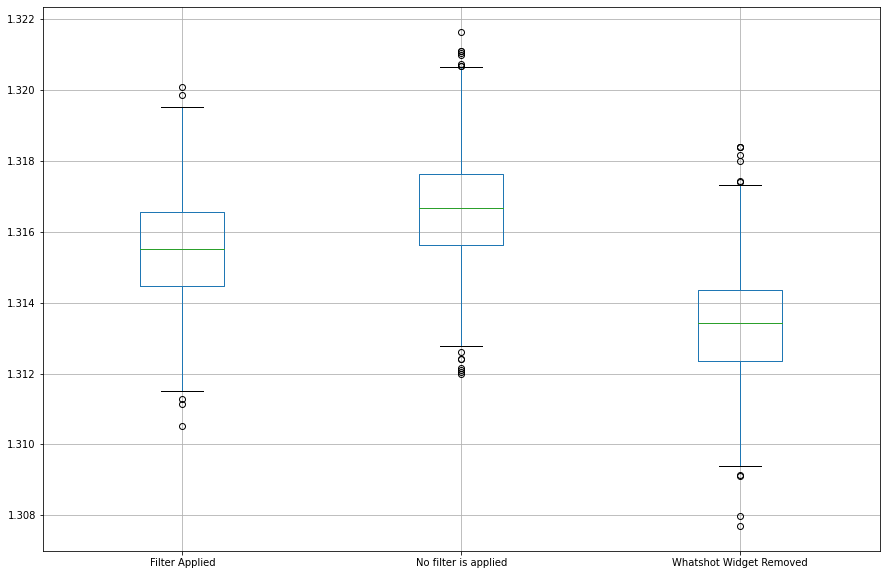

In [323]:
## Plot sampled means in boxplot for experimentation metric

plt.figure(figsize=(15,10))
dist_samples.boxplot(column=['Filter Applied', 
                                       'No filter is applied',
                                       'Whatshot Widget Removed'])

cuped_filtered = df_filtered.groupby(['user_experience']).mean()
cuped_results = cuped_filtered['CUPED-adjusted_metric']
print(cuped_results)

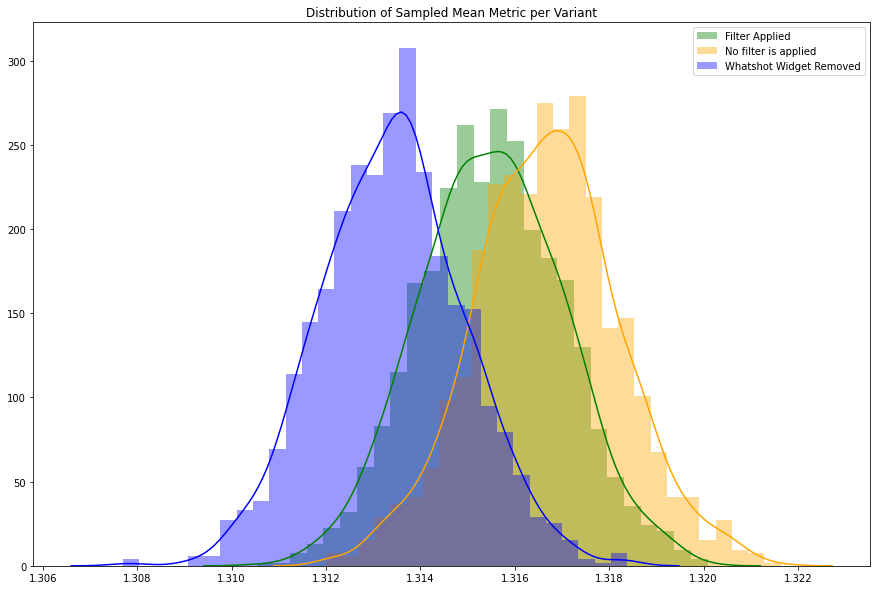

In [324]:
## Plot sampled means for metric in distribution plot

plt.figure(figsize=(15,10))
sb.distplot(dist_samples[['Filter Applied']], hist=True, color='green')
sb.distplot(dist_samples[['No filter is applied']], hist=True, color='orange')
sb.distplot(dist_samples[['Whatshot Widget Removed']], hist=True, color='blue')
plt.legend(labels=['Filter Applied','No filter is applied','Whatshot Widget Removed'])
plt.title("Distribution of Sampled Mean Metric per Variant")
plt.show()